# Logistic Regression & Classification Evaluation

## Logistic Regression Fundamentals

Logistic regression models the probabilities for classification problems with two possible outcomes (e.g. fraud/not fraud, spam/not spam). It’s an extension of the linear regression model for classification problems.

The logistic regression model uses the logistic function (sigmoid) to squeeze the output of a linear equation between 0 and 1. The logistic function is defined as:

$$\Large sigmoid(y)=\frac{1}{1+e^{-y}}$$

$$\Large y = w_0 + \sum_{i=1}^{n}w_i{x_i}$$

And it looks like this:

<img src="images/sigmoid-function.png" width=600></img>

### Intuition of weights

The interpretation of the weights in logistic regression differs from the interpretation of the weights in linear regression, since the outcome in logistic regression is a probability between 0 and 1. The weights do not influence the probability linearly any longer. The weighted sum is transformed by the logistic function to a probability. Therefore we need to reformulate the equation for the interpretation so that only the linear term is on the right side of the formula.

$$\Large log\left(\frac{P(y=1)}{1-P(y=1)}\right)=log\left(\frac{P(y=1)}{P(y=0)}\right)=w_0+w_1x_1+...+w_nx_n$$

We call the term in the log() function “odds” (probability of event divided by probability of no event) and wrapped in the logarithm it is called log odds.

This formula shows that the logistic regression model is a linear model for the log odds. With a little shuffling of the terms, you can figure out how the prediction changes when one of the features $x_j$ is changed by 1 unit. To do this, we can first apply the $exp()$ function to both sides of the equation:

$$\Large \frac{P(y=1)}{1-P(y=1)}=odds=e^{w_0+w_1x_1+...+w_nx_n}$$

Then we compare what happens when we increase one of the feature values by 1. But instead of looking at the difference, we look at the ratio of the two predictions:

$$\Large \frac{odds_{x_j+1}}{odds}=\frac{e^{w_0+w_1x_1+...+w_j(x_j+1)+…+w_nx_n}}{e^{w_0+w_1x_1+…+w_jx_j+…+w_nx_n}}$$

We apply the following rule:

$$\Large \frac{e^a}{e^b}=e^{a-b}$$

And we remove many terms:

$$\Large \frac{odds_{x_j+1}}{odds}=e^{w_j({x_j+1})-w_jx_j}=e^{w_j}$$

In the end, we have something as simple as exponent of a feature weight. A change in a feature by one unit changes the odds ratio by a factor of $e^{w_j}$. We could also interpret it this way: A change in $x_j$ by one unit increases the log odds ratio by the value of the corresponding weight.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Example

#### Import data

In [2]:
data = pd.read_csv('../datasets/social_network_ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Exploratory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


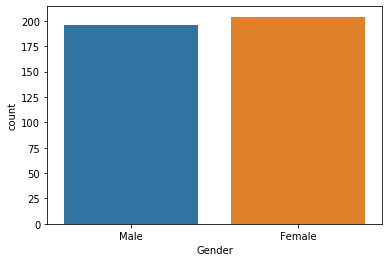

In [5]:
sns.countplot('Gender', data=data)

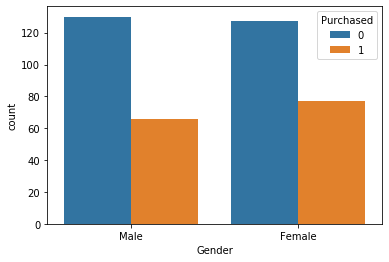

In [6]:
sns.countplot('Gender', hue='Purchased', data=data)

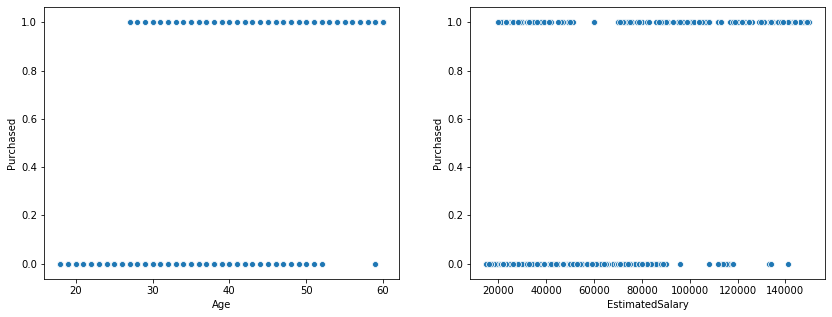

In [7]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.scatterplot('Age', 'Purchased', data=data)
plt.subplot(122)
sns.scatterplot('EstimatedSalary', 'Purchased', data=data)

Conclusions of EDA:
* Males and females are equally likely to make a purchase.
* The older a person is, the more likely he/she might make a purchase.
* If a person earns more money, it is somewhat more likely that he/she might make a purchase. However, it is a weaker predictor than age.

#### Visual demonstration of a Sigmoid function
Let's demonstrate what sigmoid function of a logistic regression with one variable, _Age_, looks like.

$$\Large
sigmoid(x)=\frac{1}{1+e^{-x}}$$

In [8]:
x = data['Age'].values.reshape(-1, 1)
y = data['Purchased']

In [9]:
lr = LogisticRegression(solver='lbfgs')

In [10]:
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

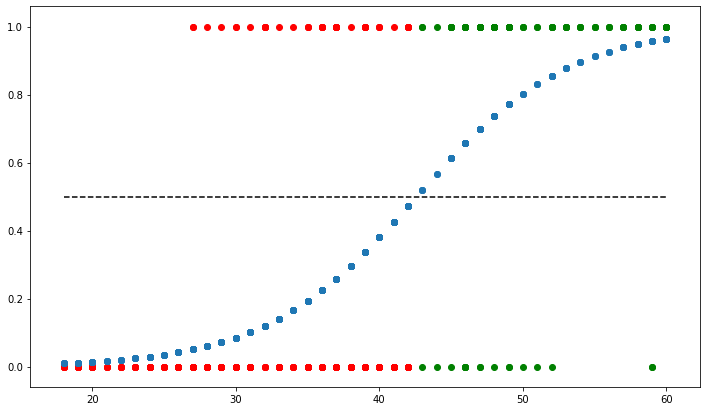

In [11]:
prob = lr.predict_proba(x)[:, 1]

# changing threshold will change which samples are classified 1 (Purchased) and which are classified 0 (Not Purchased)
th = 0.5
plt.figure(figsize=(12, 7))
plt.scatter(x[prob < th], y[prob < th], c='red', )
plt.scatter(x[prob >= th], y[prob >= th], c='green')
plt.scatter(x, lr.predict_proba(x)[:, 1])
plt.hlines(th, min(x), max(x), linestyles='dashed')

In [12]:
print('Intercept: {0}'.format(round(lr.intercept_[0], 3)))
print('Coef: {0}'.format(round(lr.coef_[0][0], 3)))

Intercept: -8.041
Coef: 0.189


$$\Large Prob\ of \ Purchase(age)=\frac{1}{1+e^{-(-8.041+0.189age)}}$$

In [13]:
# let's output probabilities of making a purchase
probdf = pd.DataFrame(data={'Age': x[:, 0], 'ProbPurchased': lr.predict_proba(x)[:, 1]})

In [14]:
probdf.drop_duplicates('Age').sort_values('Age')

,Age,ProbPurchased
14,18,0.009551
0,19,0.011514
12,20,0.013874
32,21,0.016711
58,22,0.020115
45,23,0.024195
50,24,0.029079
8,25,0.034914
2,26,0.041868
3,27,0.050136


### Multivariate Logistic Regresion
Now let's do logistic regression using _Age_ and _EstimatedSalary_ as independent variales (features) and _Purchased_ as our target feature.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
x = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [18]:
scaler = StandardScaler()

In [19]:
# first five rows of scaled values
scaler.fit_transform(x_train)[:5]

array([[-1.62887358, -0.94536942],
       [-0.0319387 ,  0.179155  ],
       [-1.81674827, -0.48402607],
       [-1.15918685, -1.0318713 ],
       [-0.21981339, -0.54169399]])

In [20]:
# first five rows of unscaled (original) values
x_train.values[:5]

array([[   20, 36000],
       [   37, 75000],
       [   18, 52000],
       [   25, 33000],
       [   35, 50000]], dtype=int64)

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predicted = logreg.predict(x_test_scaled)

## Classification Evaluation

### Confusion Matrix

Confusion matrix describes the performance of a classification model.

__True Positives (TP)__ - These are the correctly predicted positive values. E.g. if actual class value indicates that this person was admitted to university, the predicted value tells the same thing.

__True Negatives (TN)__ - These are the correctly predicted negative values. E.g. if actual class value indicates that this person was NOT admitted to university, the predicted value tells the same thing.

__False Positives (FP)__ - Classification model predicted positive values, but actual class values are negative. In statistics this type of error is called **Type I** error. E.g. model predicted that you were admitted to university, when in reality you were not. Another example, a GP diagnosed that you have a cancer, when in reality you don't.

__False Negative (FN)__ - Classification model predicted negative values, but actual class values are positive. In statistics this type of error is called **Type II** error. E.g. doctor diagnoses that you do NOT have a cancer, when actually you do.

<img src="images/confusion-matrix.jpg" width=600></img>

In [24]:
import sklearn.metrics as skmetrics

In [25]:
y_test.value_counts()

0    58
1    42
Name: Purchased, dtype: int64

In [26]:
skmetrics.confusion_matrix(y_test, y_predicted)

array([[51,  7],
       [10, 32]], dtype=int64)

Now let's look at some other classification metrics based on confusion matrix.

### Accuracy

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observations to the total observations.

$$\Large Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

In [27]:
print('Our model has correctly classified {0}% of all observations in the test data' \
      .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))

Our model has correctly classified 83.0% of all observations in the test data


### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

$$\Large Precision=\frac{TP}{TP+FP}$$


In [28]:
prec = skmetrics.precision_score(y_test, y_predicted, average=None)
prec = (prec * 100).round(1)
print('Out of all predicted positives (1), the model was correct about {0}% of them.\n' \
      'The remaining {1}% of predicted positives should have been classified as negatives (0). (Type I error)\n' \
      .format(prec[1], round(100 - prec[1], 1)))
print('Out of all predicted negatives (0), the model was correct about {0}% of them.\n' \
      'The remaining {1}% of predicted negatives should have been classified as positives (1). (Type II error)' \
      .format(prec[0], round(100 - prec[0], 1)))

Out of all predicted positives (1), the model was correct about 82.1% of them.
The remaining 17.9% of predicted positives should have been classified as negatives (0). (Type I error)

Out of all predicted negatives (0), the model was correct about 83.6% of them.
The remaining 16.4% of predicted negatives should have been classified as positives (1). (Type II error)


### Recall

Recall is the ratio of correctly predicted (recalled) positive observations out of all true positive observations

$$\Large Recall=\frac{TP}{TP+FN}$$

In [29]:
recall = skmetrics.recall_score(y_test, y_predicted, average=None)
recall = (recall * 100).round(1)
recall

array([87.9, 76.2])

In [30]:
print('Our model correctly classified (recalled) {0}% positives (1) and {1}% negatives (0).\n' \
     .format(recall[1], recall[0]))

Our model correctly classified (recalled) 76.2% positives (1) and 87.9% negatives (0).



### F1 Score

F1 score is a weighted average of the recall and precision. F1 score might be good choice when you seek to balance between Precision and Recall.

$$\Large F1 \ score=2\times\frac{Precision\times Recall}{Precision+Recall}$$

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_test, y_predicted)

0.7901234567901233

### ROC Curve

An __ROC curve (receiver operating characteristic curve)__ is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for Recall and is therefore defined as follows:

$$\Large TPR=\frac{TP}{TP+FN}$$

False Positive Rate (FPR) is defined as follows:

$$\Large FPR=\frac{FP}{FP+TN}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Remember, the default classification threshold is 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1). Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

For example, in a smog prediction system, we may be far more concerned with having low false negatives than low false positives. A false negative would mean not warning about a smog day when in fact it is a high smog day, leading to health issues in the public that are unable to take precautions. A false positive means the public would take precautionary measures when they didn't need to.

<img src="images/roc-curve.png" width=600></img>

The ROC curve is a useful tool for a few reasons:

- The curves of different models can be compared directly in general or for different thresholds.
- The area under the curve (AUC) can be used as a summary of the model skill.

The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

- Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
- Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [34]:
predicted_prob = logreg.predict_proba(x_test_scaled)[:, 1]

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_prob)

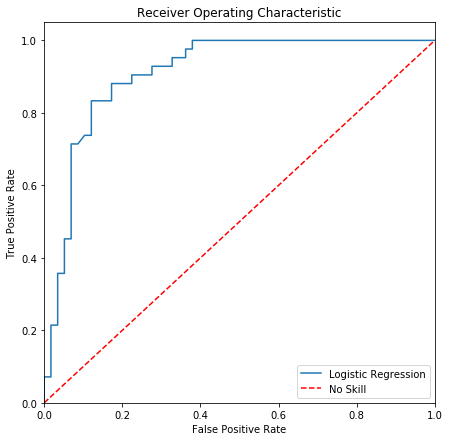

In [36]:
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [37]:
roc_table = pd.DataFrame(data={'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})

In [38]:
roc_table

,fpr,tpr,thresholds
0,0.000000,0.000000,1.981939
1,0.000000,0.023810,0.981939
2,0.000000,0.071429,0.981189
3,0.017241,0.071429,0.978208
4,0.017241,0.214286,0.896087
5,0.034483,0.214286,0.870445
6,0.034483,0.357143,0.766944
7,0.051724,0.357143,0.757325
8,0.051724,0.404762,0.747386
9,0.051724,0.452381,0.736839


### Area Under Curve (AUC)

__AUC__ stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC ranges in value from 0 to 1. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease. An excellent model has AUC near to the 1 which means it has good measure of separability (distinguishing between classes). A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.

<img src="images/roc-auc-curve.png" width=300></img>

#### Probability Distributions

Once classification of observations in the test data has been done, we can create probability distributions for each class and plot them.

In [39]:
results = x_test.join(y_test).join(pd.Series(predicted_prob, index=x_test.index, name='Probs'))
results.head()

,Age,EstimatedSalary,Purchased,Probs
280,59,88000,1,0.981189
307,47,113000,1,0.896087
301,48,74000,1,0.767777
196,30,79000,0,0.077271
191,19,26000,0,0.001643


In [40]:
results['Match'] = results.apply(lambda x: x['Purchased'] == np.round(x['Probs']), axis=1)
results.groupby(['Purchased', 'Match'])['Purchased'].count()

Purchased  Match
0          False     7
           True     51
1          False    10
           True     32
Name: Purchased, dtype: int64

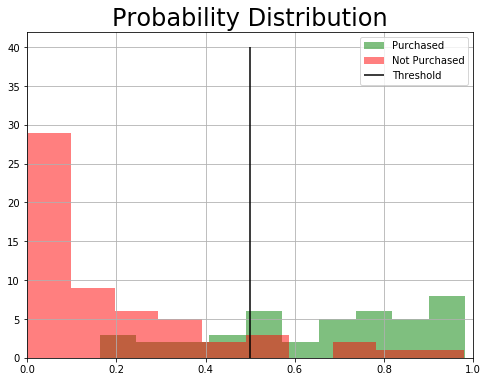

In [41]:
plt.figure(figsize=(8, 6))
plt.title('Probability Distribution', size=24)
results[results['Purchased'] == 1]['Probs'].hist(
    color='green', alpha=0.5, label='Purchased', bins=10)
results[results['Purchased'] == 0]['Probs'].hist(
    color='red', alpha=0.5, label='Not Purchased', bins=10)
plt.xlim(0, 1)
plt.vlines(0.5, 0, 40, label='Threshold')
plt.legend()

Red distribution represents all users who did not make a purchase and the green distribution represents all users who made a purchase. Black vertical line represents threshold, 0.5. If predicted probability is above threshold and the user did make a purchase, it will be __True Positive__, otherwise __False Positive__. If predicted probability is below threshold and the user did not make a purchase, it will be __True Negative__, otherwise __False Negative__. 

We see that our model made a few __False Positive__ predictions (red columns on the right of the threshold) and many __False Negative__ predictions (green columns on the left of the threshold).

In a perfect scenario we would like to have distributions that don't overlap because that would yield no False Positives and False Negatives, and AUC would be 1.

Below are a few examples of different distributions, ROC curve and AUC.

<img src="images/various-roc-auc-1.png" width=400></img>

When distributions overlap, we introduc Type I and Type II error. Depending on the threshold, we can minimize or maximize them. When AUC is 0.8, it means there is 80% chance that model will be able distinguish between positive class and negative class.

<img src="images/various-roc-auc-2.png" width=400></img>

In the last model, predictions are completely overlapping each other and we get the AUC score of 0.5. This is the worst situation, and it means that model has no discrimination capacity to distinguish between positive class and negative class and classification is done randomly.

And finally, when AUC is approximately 0, model is actually reciprocating the classes. It means, model is predicting negative class as a positive class and vice versa.

In [42]:
from sklearn.metrics import auc

In [43]:
auc(fpr, tpr)

0.910303776683087